In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')
print(df.head())

# 2
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)
print(df.head())

# 3
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)



   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0

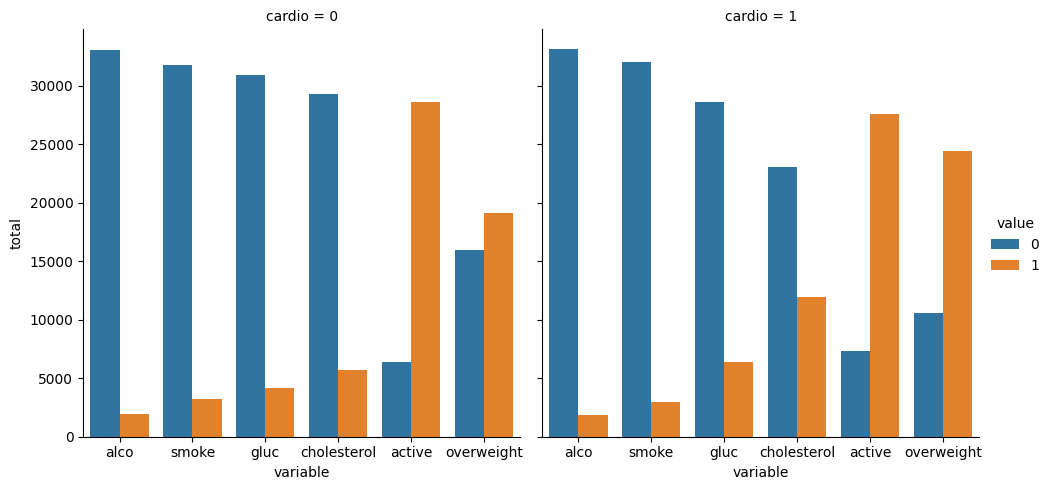

In [10]:
# 4
def draw_cat_plot():
    # 5:
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],  
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']  
    )

    # 6
    df_cat = df_cat.value_counts(['cardio', 'variable', 'value']).reset_index(name='total')

    # 7
    g = sns.catplot(
        x='variable', y='total', hue='value', col='cardio',
        data=df_cat, kind='bar', height=5, aspect=1
    )

    # 8
    fig = g.figure

    # 9
    fig.savefig('catplot.png')
    plt.close(fig)
    return fig

draw_cat_plot()

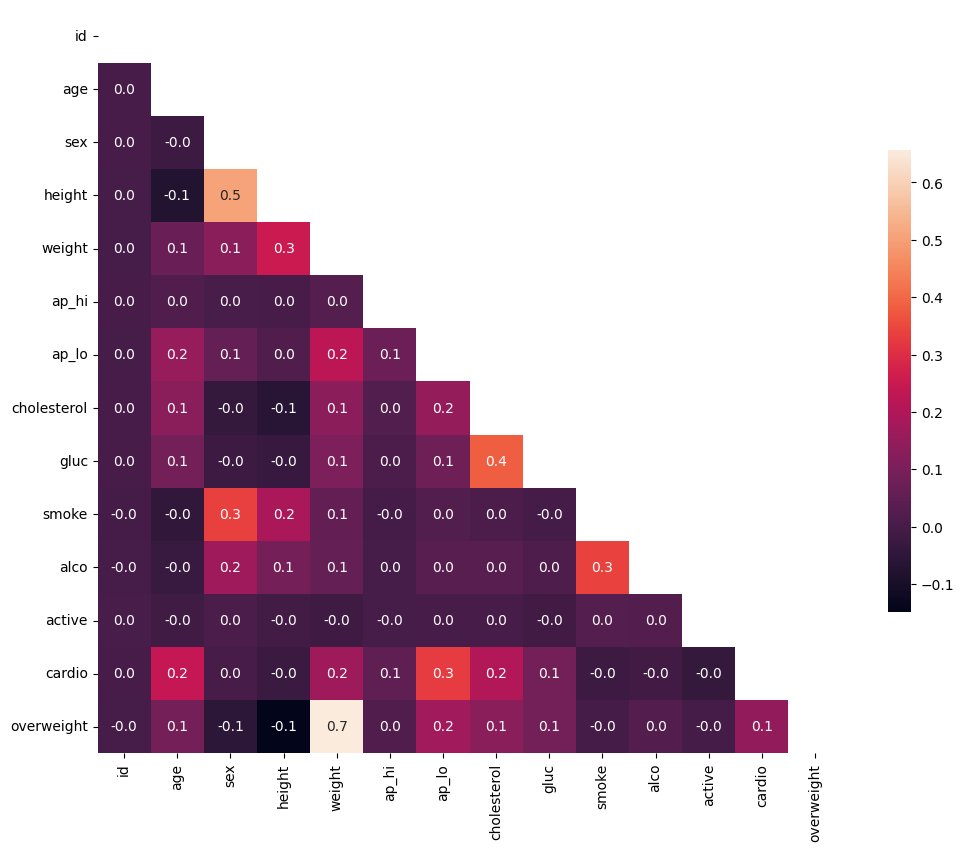

In [14]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &  # Diastolic pressure <= Systolic pressure
        (df['height'] >= df['height'].quantile(0.025)) &  # Height >= 2.5th percentile
        (df['height'] <= df['height'].quantile(0.975)) &  # Height <= 97.5th percentile
        (df['weight'] >= df['weight'].quantile(0.025)) &  # Weight >= 2.5th percentile
        (df['weight'] <= df['weight'].quantile(0.975))    # Weight <= 97.5th percentile
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr,dtype=bool))

    # 14
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        square=True,
        cbar_kws={"shrink": 0.5},
        ax=ax
    )

    # 16
    fig.savefig('heatmap.png')
    plt.close(fig)
    return fig

draw_heat_map()
